In [6]:
import xlfluor as xlf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

global DEBUG
DEBUG = True

%matplotlib notebook

In [66]:

# Press Umschalt+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

#### Let us build a cavity
vacuum = xlf.Vacuum()
carbon = xlf.Element(name = 'c', Z= 6, atom_weight = 12.011,density = 2.2*1e3) # the factor 1e3 converts from g/cm3 to Kg/m3
silicon = xlf.Element(name = 'si', Z= 14, atom_weight = 28.086,density = 2.33*1e3)
iron = xlf.Element(name = 'fe', Z = 26, atom_weight=55.845, density=7.87*1e3)
oxygen = xlf.Element(name = 'o', Z = 8, atom_weight=15.999, density=0.143E-02*1e3) # Oxygen density is as gas!!
platinum = xlf.Element(name = 'pt', Z = 78, atom_weight=195.078, density=21.5*1e3)

iron_oxide = xlf.Composite(name = 'fe2o3', elements=[iron, oxygen], density=5.07*1e3, composition =[2,3])

layer_list_custom = [
    xlf.Layer(platinum, 2.8 * 1e-9, density=21.0e3),
    xlf.Layer(carbon, 31.26 * 1e-9, density=1.7e3),
    xlf.Layer(iron_oxide, 3.9 * 1e-9, inelastic_cross=0.4e9, density=4.5e3),
    xlf.Layer(carbon, 34.136 * 1e-9, density=1.6e3),
    xlf.Layer(platinum, 15 * 1e-9, density=21.00e3),
    xlf.Layer(silicon, np.inf, density = 2.33*1e3, final = True)
]

cavity = xlf.Cavity(layer_list_custom)

parameters = cavity.parameters


Material vacuum Initiating.
Material c Initiating.
Material si Initiating.
Material fe Initiating.
Material o Initiating.
Material pt Initiating.
Material fe2o3 Initiating.
Material pt Initiating.
pt Layer Initiated.
Material c Initiating.
c Layer Initiated.
Material fe2o3 Initiating.
fe2o3 Layer Initiated.
Material c Initiating.
c Layer Initiated.
Material pt Initiating.
pt Layer Initiated.
Material si Initiating.
si Layer Initiated.
Cavity Initiated.


In [67]:

"""#### Let us read some experimental data for comparison
wide_scan = pd.read_pickle('scan_486_wide_angle_diode.gz')
experiment_data = {
    'fluor_trace': xlf.normmax(wide_scan.fluor_diode),
    'refl_trace': xlf.normmax(wide_scan.refl),
    'angles_in': np.array(wide_scan['sry']),
    'angles_out': np.array(wide_scan['sry']),
    'energies_in': np.array([wide_scan['energy'], ]),
    'energies_out': np.array([6400, ])
}
"""

#### Manual solution for testing
energies_in=np.array([7300])
energies_out=np.array([6400])
angles_in  = np.array([xlf.deg2rad(0.3)])#np.linspace(xlf.deg2rad(0.2),xlf.deg2rad(1.0),250)
angles_out = np.array(xlf.deg2rad(np.array([0.2,0.3])))#np.linspace(xlf.deg2rad(0.2),xlf.deg2rad(1.0),260)

axes = (energies_in,energies_out,angles_in,angles_out)


my_problem = xlf.Problem(cavity, experiment_data = None, axes=axes, passive_layer_resolution = 1, active_layer_resolution = 3)

my_problem.solve(cavity, parameters)

Layer Solution Calculated.
Layer Solution Calculated.
Layer Solution Calculated.
Layer Solution Calculated.
Layer Solution Calculated.
Layer Solution Calculated.
ProblemSolution Initiated.
Problem Initiated.
Result Initiated.


In [71]:
cavity.solution.L_matrices_out_partials[0,0]

array([[[41.48019291-38.74597378j, 11.20427878-58.99246892j],
        [28.92597506+49.79275619j, 55.81546591+24.44785677j]],

       [[41.48019291-38.74597378j, 11.20427878-58.99246892j],
        [28.92597506+49.79275619j, 55.81546591+24.44785677j]],

       [[41.48019291-38.74597378j, 11.20427878-58.99246892j],
        [28.92597506+49.79275619j, 55.81546591+24.44785677j]],

       [[24.98509244-11.18619647j, 14.33138995-25.14877784j],
        [20.2811147 +18.53982329j, 28.91666716 +3.16683677j]],

       [[24.98509244-11.18619647j, 14.33138995-25.14877784j],
        [20.2811147 +18.53982329j, 28.91666716 +3.16683677j]],

       [[        nan +0.j        ,         nan +0.j        ],
        [        nan +0.j        ,         nan +0.j        ]],

       [[        nan +0.j        ,         nan +0.j        ],
        [        nan +0.j        ,         nan +0.j        ]],

       [[        nan +0.j        ,         nan +0.j        ],
        [        nan +0.j        ,         nan +0.j     

In [68]:
my_problem.z_axis


array([1.4000e-09, 1.8430e-08, 3.4710e-08, 3.6010e-08, 3.7310e-08,
       5.5028e-08, 7.9596e-08, 8.7596e-08, 8.8596e-08, 8.9596e-08])

In [ ]:
array([[ 1.26353414-2.29159661j, -0.43176571-2.5646577j ],
       [ 0.43176571+2.5646577j ,  2.10486184+2.06471011j]])

<IPython.core.display.Javascript object>


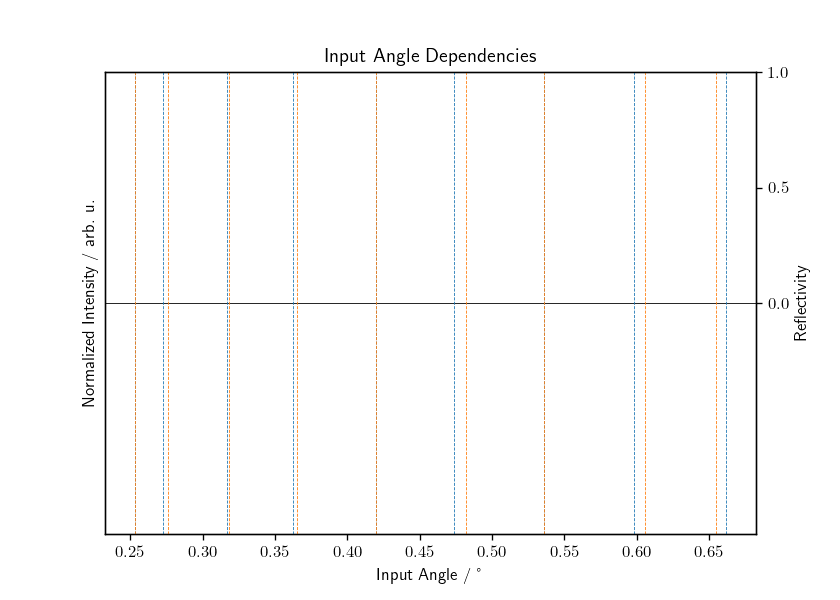

In [52]:



###################################################
##### Diode trace plots
###################################################
plt.figure(figsize=(7, 5))
ax1 = plt.gca()
plt.ylabel('Normalized Intensity / arb. u.')
plt.plot(xlf.normmax(my_problem.angles_in), xlf.abs2(my_problem.reflectivity)[0,:] * np.nan, 'C4-',
         label='Simulated Reflectivity')  # dummy plots for legend
plt.plot(xlf.normmax(my_problem.angles_in), xlf.abs2(my_problem.reflectivity)[0,:] * np.nan, 'C0--',
         label='Measured Reflectivity')

plt.plot(xlf.normmax(my_problem.angles_in), xlf.normmax(xlf.abs2(my_problem.fluorescence_I_angle_in_dependent)), c='C3',
         label='Simulated Fluorescence')
data_shift = 0

# plt.ylim(None,6)
plt.xlabel('Input Angle / °')
plt.title(f'Input Angle Dependencies')
plt.yticks([])
plt.ylim(None, 2)

ax2 = plt.gca().twinx()
plt.plot(xlf.normmax(my_problem.angles_in), xlf.normmax(xlf.abs2(my_problem.reflectivity)[0,:]), 'C4-', label='Simulated refl')
plt.ylabel('Reflectivity')
plt.ylim(-1, None)
plt.yticks([0, 0.5, 1])
plt.axhline(c='k', lw=.5)

mode_angles = [.253, .2725, .317, .3625, .420, .474, .536, .598, .662]
for angle in mode_angles:
    plt.axvline(angle - data_shift, lw=.5, c='C0', ls='--')
mode_angles = [.253, .276, .318, .365, .420, .482, .536, .606, .655]
for angle in mode_angles:
    plt.axvline(angle - data_shift, lw=.5, c='C1', ls='--')




In [41]:
cavity.solution.incident_field_amplitude.shape

(1, 250, 103)

<IPython.core.display.Javascript object>


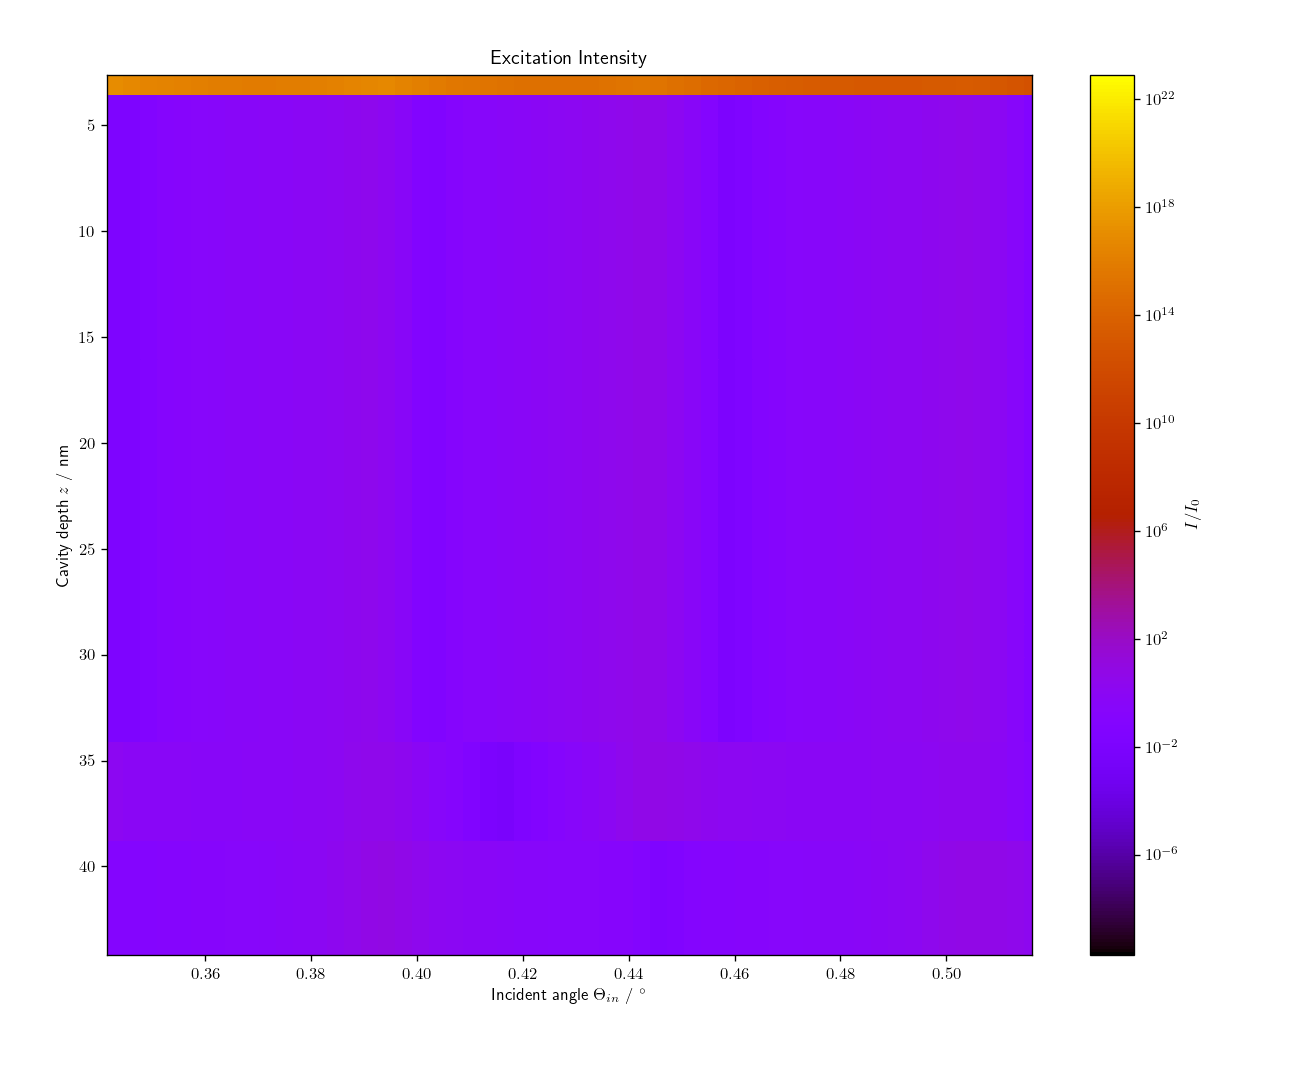

(80.0, 0.06999999999999999)

In [42]:

mpl.rcParams['text.usetex'] = True

plt.figure(figsize = (7,5))
plt.pcolormesh(xlf.rad2deg(my_problem.angles_in),my_problem.z_axis*1e9, xlf.abs2(cavity.solution.incident_field_amplitude[0,:,:]).T,\
               cmap = 'gnuplot', norm = mpl.colors.LogNorm(),shading = 'nearest')

plt.ylabel('Cavity depth $z$ / nm')
plt.xlabel('Incident angle $ { \Theta}_{in}$ / $^\circ$')
plt.title('Excitation Intensity')
plt.colorbar(label='$I / I_0$')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.ylim(80,None)


<IPython.core.display.Javascript object>


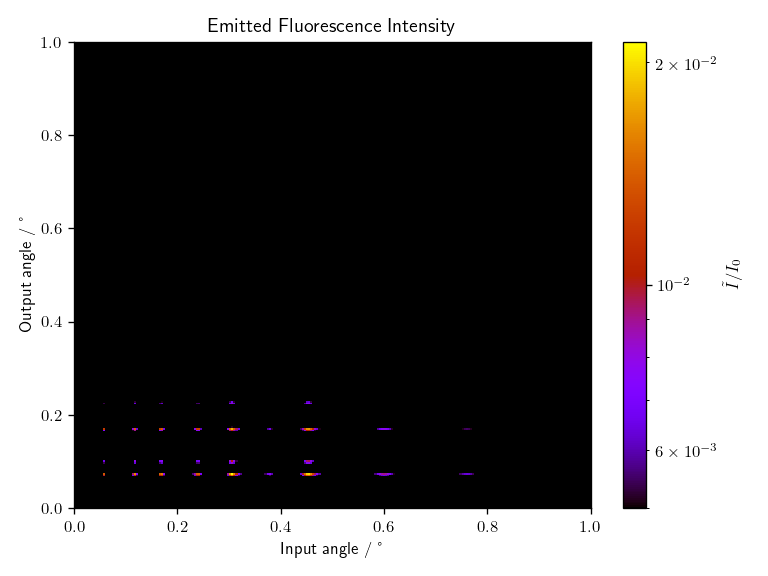

<IPython.core.display.Javascript object>


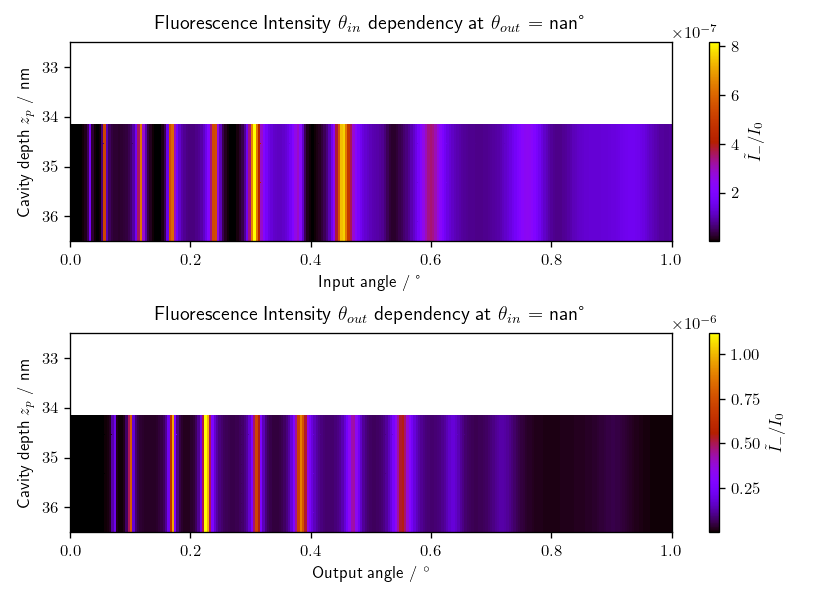

In [43]:


#####################################################
######### 2d Plot
################################################
#plotmat = xlf.abs2(cavity.solution.fluorescence_emitted_amplitude[0,0,:,:])
plotmat = xlf.abs2(np.nansum(cavity.solution.fluorescence_local_amplitude[0,0,:,:,:,0],2)) # sum over depth of non-propagated fluorescence
#plotmat = cplxsq(my_problem.fluor_emitted_from_z[:,:,:])
#plotmat = cplxsq(np.sum(my_problem.fluor_emitted_from_z[:,:,:],0))

plt.figure()
plt.pcolormesh(xlf.normmax(my_problem.angles_in),xlf.normmax(my_problem.angles_out),\
               plotmat.T,norm = mpl.colors.LogNorm(vmin = 0.005), cmap = 'gnuplot', shading = 'nearest')#,vmax=4e3)#
plt.ylabel('Output angle / °')
plt.xlabel('Input angle / °')
plt.title('Emitted Fluorescence Intensity')
plt.colorbar(label=r'$\tilde{I} / I_0$')
plt.tight_layout()


#########################################


example_angle_in = xlf.deg2rad(0.3)
example_angle_in_index = np.argmin(np.abs(example_angle_in-my_problem.angles_in))

example_angle_out = xlf.deg2rad(0.342)
example_angle_out_index = np.argmin(np.abs(example_angle_out-my_problem.angles_out))



fig, axes = plt.subplots(2,1, figsize = (7,5))
plt.sca(axes[0])
plt.pcolormesh(xlf.normmax(my_problem.angles_in),my_problem.z_axis*1e9,\
               xlf.abs2(cavity.solution.fluorescence_local_amplitude_propagated[0,0,:,example_angle_out_index,:]).T,shading = 'nearest',cmap = 'gnuplot')
plt.axvline(xlf.normmax(example_angle_in), ls = '--', lw= 1, c='grey')

plt.ylabel('Cavity depth $z_p$ / nm')
plt.xlabel('Input angle / °')
plt.title(r'Fluorescence Intensity $\theta_{in}$ dependency at $\theta_{out}$ ='+f' {xlf.normmax(my_problem.angles_out[example_angle_out_index]):.2}°')
plt.colorbar(label=r'$\tilde{I}_{-} / I_0$')
plt.gca().invert_yaxis()
plt.ylim(32.5,36.5)
plt.tight_layout()
plt.gca().invert_yaxis()

plt.sca(axes[1])
plt.pcolormesh(xlf.normmax(my_problem.angles_out),my_problem.z_axis*1e9,\
               xlf.abs2(cavity.solution.fluorescence_local_amplitude_propagated[0,0,example_angle_in_index,:,:]).T,shading = 'nearest', vmax=None,cmap = 'gnuplot')#, norm = mpl.colors.LogNorm()
plt.axvline(xlf.normmax(example_angle_out), ls = '--', lw= 1, c='grey')
plt.ylabel('Cavity depth $z_p$ / nm')
plt.xlabel('Output angle / $^\circ$')
plt.title(r'Fluorescence Intensity $\theta_{out}$ dependency at $\theta_{in}$ ='+f' {xlf.normmax(my_problem.angles_in[example_angle_in_index]):.2}°')
plt.colorbar(label=r'$\tilde{I}_{-} / I_0$')
plt.gca().invert_yaxis()
plt.ylim(32.5,36.5)
plt.tight_layout()
plt.gca().invert_yaxis()



plt.show()